https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
newdata = pd.read_csv("C:\\Users\\acer\\Downloads\\amazon.csv", encoding='latin1', parse_dates=['date'])

In [155]:
newdata.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

## 1. Display Top 5 Rows of The Dataset

In [156]:
newdata.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


## 2. Check Last 5 Rows

In [157]:
newdata.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


## 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [158]:
newdata.shape

(6454, 5)

In [33]:
print("Number of Rows: ", data.shape[0])
print("Number of Columns: ", data.shape[1])

Number of Rows:  6454
Number of Columns:  5


## 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [159]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


## 5. Check For Duplicate Data and Drop Them

In [160]:
dup_data = newdata.duplicated().any()

In [39]:
print("Are there any duplicated values in the data :", dup_data)

Are there any duplicated values in the data : True


In [161]:
newdata = newdata.drop_duplicates()

In [162]:
newdata.shape

(6422, 5)

## 6. Check Null Values In The Dataset

In [163]:
newdata.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

## 7. Get Overall Statistics About The Dataframe

In [164]:
newdata.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


## 8. Rename Month Names To English

In [165]:
newdata.head(5)

# we need to convert the Portuguese month names to English.

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [174]:
newdata['month_new'] = newdata['month'].map({'Janeiro':'January',
                                      'Fevereiro':'February',
                                      'Marco':'March',
                                      'Abril':'April',
                                      'Maio':'May',
                                      'Junho':'June',
                                      'Julho':'July',
                                      'Agosto':'August',
                                      'Setembro':'September',
                                      'Outubro':'October',
                                      'Novembro':'November',
                                      'Dezembro':'December'
                                      })

In [166]:
newdata.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


## 9. Total Number of Fires Registered

In [175]:
newdata.shape

(6422, 6)

## 10. In Which Month Maximum Number of Forest Fires Were Reported?

In [176]:
newdata.columns

# in this question we should use "groupby" and "reset_index"

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [177]:
data1 = newdata.groupby('month_new')['number'].sum().reset_index()
data1

# reset_index is used to get "index"

,month_new,number
0,April,28184.770
1,August,88050.435
2,December,57535.480
3,February,30839.050
4,January,47681.844
5,July,92319.113
6,June,55997.675
7,May,34725.363
8,November,85508.054
9,October,88681.579


In [61]:
# in the above table, month_new is the "index column"

<Axes: xlabel='month_new', ylabel='number'>

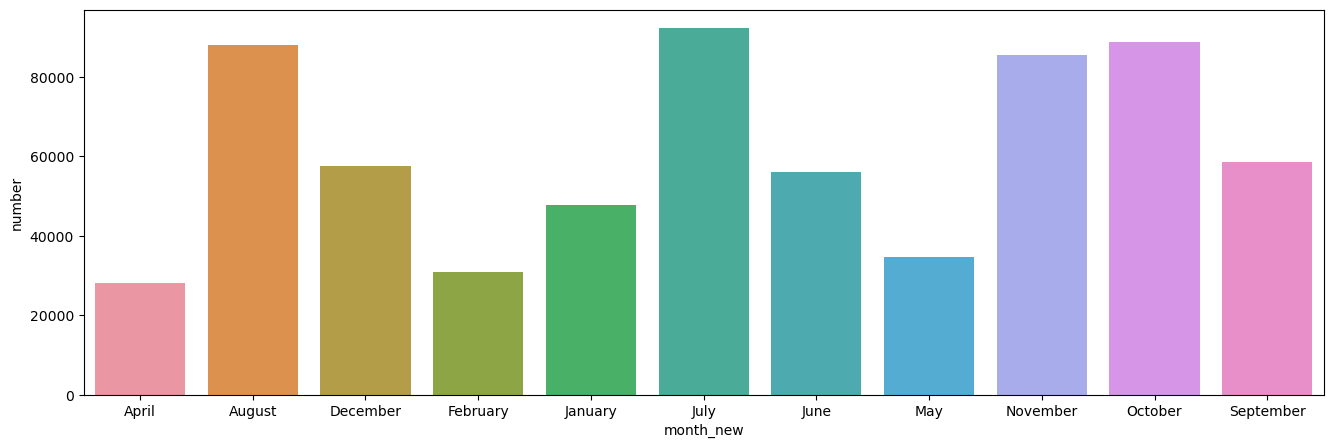

In [178]:
# lets visualize

plt.figure(figsize=(16,5))
sns.barplot(x='month_new',y='number', data=data1)

In [64]:
# from the above bargraph, it is clear that July has maximum number of forest fires reported

## 11. In Which Year Maximum Number of Forest Fires Was Reported?

In [179]:
newdata.head(2)

# we need to use "groupby" and "reset_index"

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January


In [180]:
data2 = newdata.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

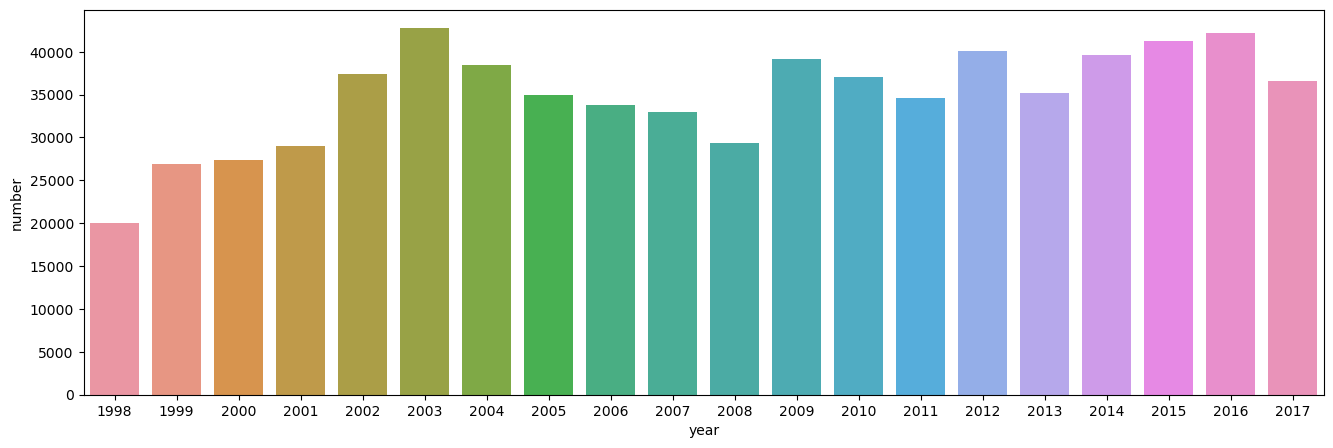

In [181]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=data2)

In [75]:
# from the above graph it is clear that 2003 has reported the maximum number of fire.

## 12. In Which State Maximum Number of Forest Fires Was Reported?


In [182]:
newdata.head(2)

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January


In [183]:
data3 = newdata.groupby('state')['number'].max().reset_index()
data3

,state,number
0,Acre,960.0
1,Alagoas,162.0
2,Amapa,969.0
3,Amazonas,998.0
4,Bahia,995.0
5,Ceara,995.0
6,Distrito Federal,196.0
7,Espirito Santo,307.0
8,Goias,943.0
9,Maranhao,972.0


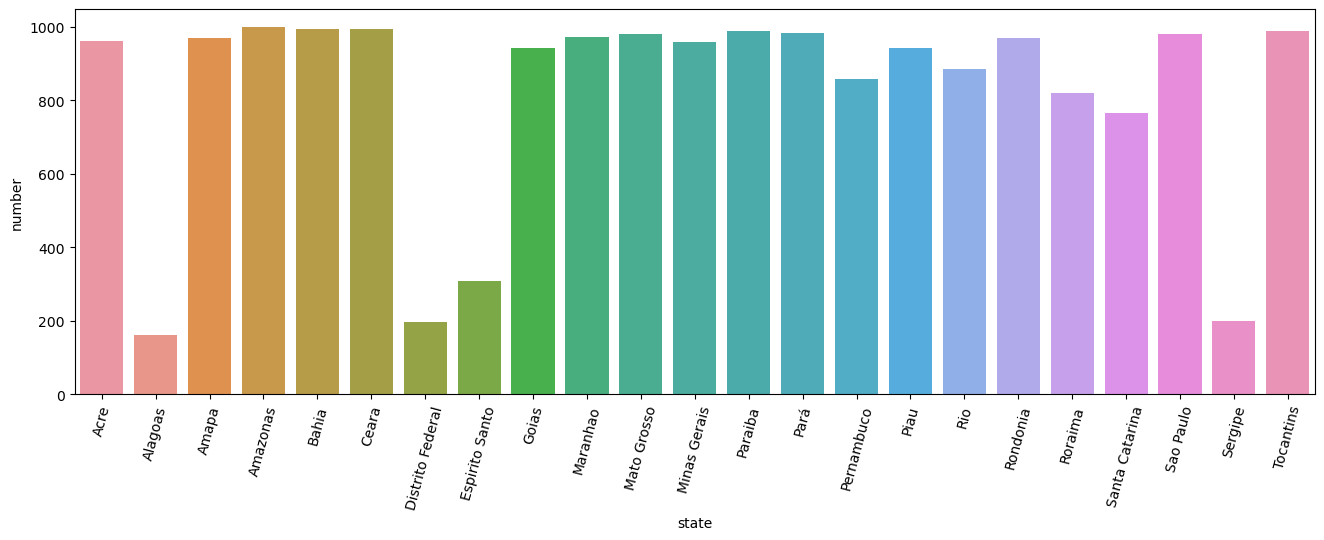

In [184]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=data3)
plt.xticks(rotation=75)
plt.show()

In [89]:
# from the above graph it is clear that maximum number of Forest fires has occurred in Amazonas, followed by Tocatins and Bahia

## 13. Find Total Number of Fires Were Reported In Amazonas

In [185]:
newdata.columns

# first step - filter state to Amazonas
# second step - find sum of number column
# third step - put all these in a data frame

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [186]:
newdata[newdata['state']=='Amazonas']['number'].sum()

30650.129

## 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)


In [187]:
newdata.columns

# first step - filter to Amazonas and put as variable
# second step - groupby that variable with "year" and "number" and "reset_index"
# third step - visualize it with barplot

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [188]:
data4 = newdata[newdata['state']=='Amazonas']
data5 = data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


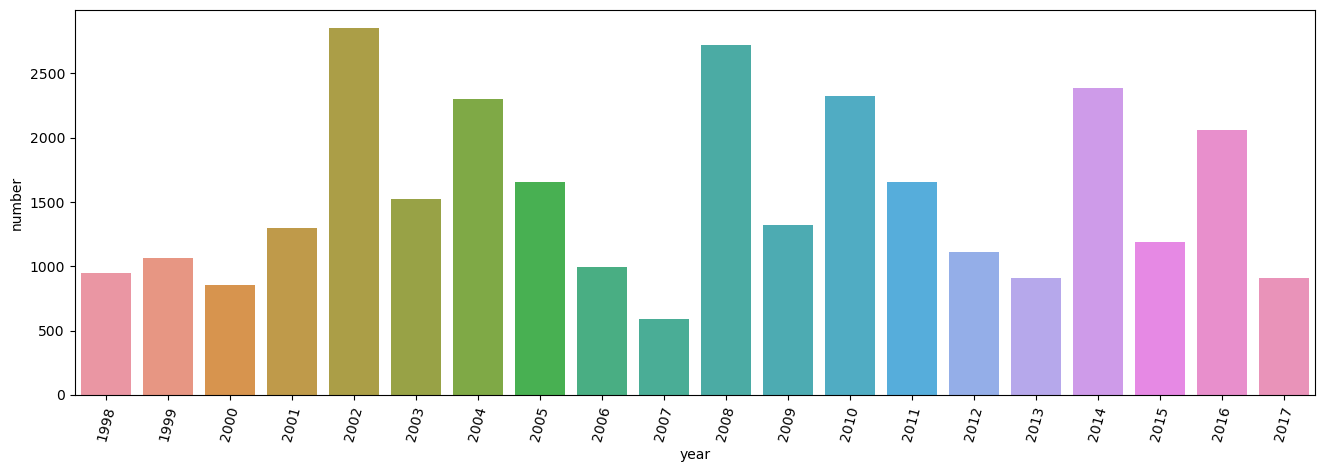

In [113]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=data5)
plt.xticks(rotation=75)
plt.show()

In [112]:
# from the above bar graph it is clear that 2002 has reported the most number of forest fires in Amazonas followed by 2008

## 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [189]:
newdata.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [190]:
data6 = newdata[newdata['state']=='Amazonas']
data6

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,January
719,1999,Amazonas,Janeiro,3.0,1999-01-01,January
720,2000,Amazonas,Janeiro,7.0,2000-01-01,January
721,2001,Amazonas,Janeiro,3.0,2001-01-01,January
722,2002,Amazonas,Janeiro,17.0,2002-01-01,January
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,December
953,2013,Amazonas,Dezembro,236.0,2013-01-01,December
954,2014,Amazonas,Dezembro,293.0,2014-01-01,December
955,2015,Amazonas,Dezembro,565.0,2015-01-01,December


In [191]:
day = data6.groupby(data6['date'].dt.dayofweek)['number'].sum()

# lets display proper weekdays, for that import calendar module
import calendar

day.index = [calendar.day_name[x] for x in range(0,7)]
day.reset_index

<bound method Series.reset_index of Monday       1886.601
Tuesday      6474.217
Wednesday    3910.177
Thursday     5754.802
Friday       5446.480
Saturday     4162.666
Sunday       3015.186
Name: number, dtype: float64>

In [200]:
sns.barplot(x='index',y='number',data=day())

TypeError: 'Series' object is not callable

## 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’


In [193]:
newdata.columns

# first step - filter to 2015
# second step - groupby "month_new" and "number" and use "sum()"
# third step - use "reset_index" to find index positions

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [194]:
fire = newdata[newdata['year']==2015].groupby('month_new')['number'].sum().reset_index

In [195]:
fire

<bound method Series.reset_index of month_new
April        2573.000
August       4363.125
December     4088.522
February     2309.000
January      4635.000
July         4364.392
June         3260.552
May          2384.000
November     4034.518
October      4499.525
September    2494.658
Name: number, dtype: float64>

<Axes: xlabel='month_new', ylabel='number'>

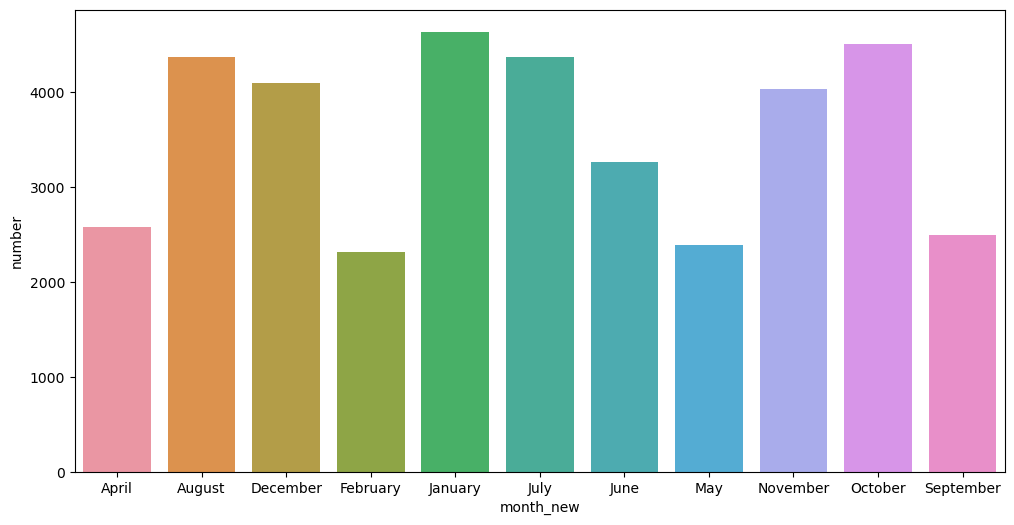

In [201]:
plt.figure(figsize=(12,6))
sns.barplot(x="month_new", y="number", data=fire())

## 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)


In [215]:
newdata.columns

# 1. Find which all columns we need to use
# 2. use groupby
# 3. use mean()
# 4. sort_values(ascending=False)
# 5. assign a variable
# 6. use "reset_index"

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [213]:
data8 = newdata.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

In [214]:
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


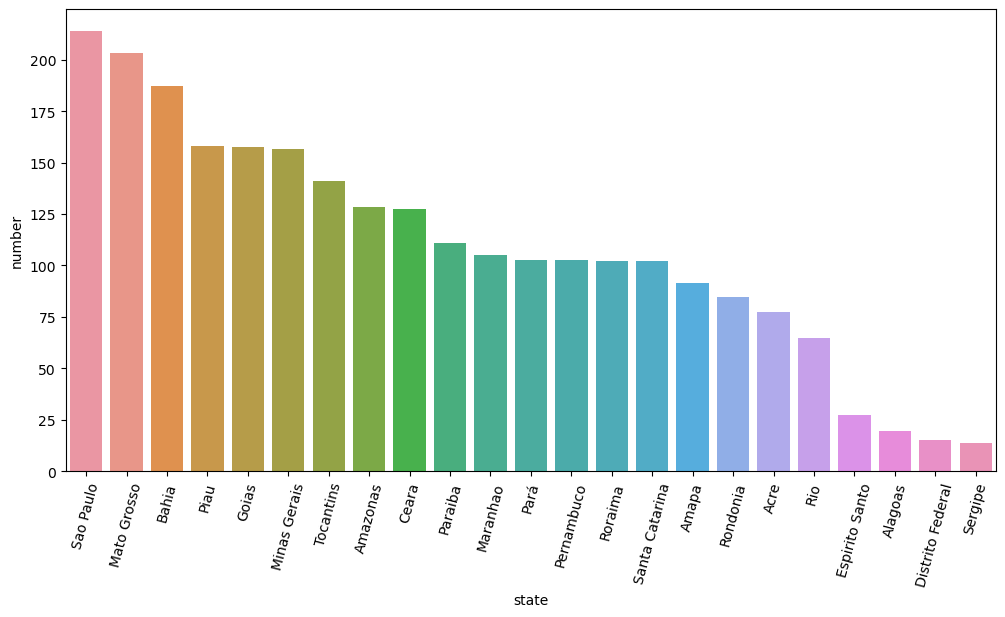

In [220]:

plt.figure(figsize=(12,6))
sns.barplot(x="state", y="number", data=data8)
plt.xticks(rotation=75)
plt.show()

## 18.  To Find The State Names Where Fires Were Reported In 'dec' Month


In [226]:
newdata.columns

# 1. filter to "December"
# 2. then filter to "state"
# 3. use "unique" to get names

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [227]:
newdata[newdata['month_new']=="December"]['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [ ]:
# reference - https://www.youtube.com/watch?v=fsQAIk4O1Rc&list=PL_1pt6K-CLoDMEbYy2PcZuITWEjqMfyoA&index=16